<a href="https://colab.research.google.com/github/jona-lu/olist_project/blob/main/olist_project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd
import os 
import matplotlib.pyplot as plt
working_directory=os.getcwd()
print(working_directory)

/content


In [ ]:
path=working_directory+'/sample_data/olist_customers_dataset.csv'
path1=working_directory+'/sample_data/olist_geolocation_dataset.csv'
path2=working_directory+'/sample_data/olist_order_items_dataset.csv'
path3=working_directory+'/sample_data/olist_order_payments_dataset.csv'
path4=working_directory+'/sample_data/olist_order_reviews_dataset.csv'
path5=working_directory+'/sample_data/olist_orders_dataset.csv'
path6=working_directory+'/sample_data/olist_products_dataset.csv'
path7=working_directory+'/sample_data/olist_sellers_dataset.csv'
path8=working_directory+'/sample_data/product_category_name_translation.csv'

olist_customers_dataset=pd.read_csv(path)
olist_geolocation_dataset=pd.read_csv(path1)
olist_order_items_dataset=pd.read_csv(path2)
olist_order_payments_dataset=pd.read_csv(path3)
olist_order_reviews_dataset=pd.read_csv(path4)
olist_orders_dataset=pd.read_csv(path5)
olist_products_dataset=pd.read_csv(path6)
olist_sellers_dataset=pd.read_csv(path7)
product_category_name_translation=pd.read_csv(path8)

In [ ]:
olist_orders_dataset = olist_orders_dataset.dropna()
olist_products_dataset= olist_products_dataset.dropna()
data=pd.merge(olist_orders_dataset,olist_order_items_dataset,how='inner',on=['order_id'])
data=pd.merge(data,olist_order_payments_dataset,how='inner',on=['order_id'])
data=pd.merge(data,olist_order_reviews_dataset,how='inner',on=['order_id'])
data=pd.merge(data,olist_customers_dataset,how='inner',on=['customer_id'])
data=pd.merge(data,olist_products_dataset,how='left',on=['product_id'])
data=pd.merge(data,product_category_name_translation,how='left',on=['product_category_name'])

In [ ]:
import datetime
data['order_approved_at']=pd.to_datetime(data.loc[:,'order_approved_at'])
data["order_purchase_timestamp"] = pd.to_datetime(data["order_purchase_timestamp"])
data["order_delivered_carrier_date"] = pd.to_datetime(data["order_delivered_carrier_date"])
data['order_delivered_customer_date']=pd.to_datetime(data['order_delivered_customer_date'])
data['order_estimated_delivery_date']=pd.to_datetime(data['order_estimated_delivery_date'])
data['shipping_limit_date']=pd.to_datetime(data['shipping_limit_date'])
data['lead_time_po_approved']=(data['order_approved_at']-data['order_purchase_timestamp'])
data['lead_time_po_approved']=data['lead_time_po_approved']/np.timedelta64(1,'D') ##this is the key to turn into numeric days

data['lead_time_po_customer']=(data['order_delivered_carrier_date']-data['order_purchase_timestamp'])
data['lead_time_po_customer']=data['lead_time_po_customer']/np.timedelta64(1,'D') ##this is the key to turn into numeric days

data['promosied_actual']=(data['order_estimated_delivery_date']-data['order_delivered_customer_date'])
data['promosied_actual']=data['promosied_actual']/np.timedelta64(1,'D') ##this is the key to turn into numeric days

data['order_year']=pd.DatetimeIndex(data['order_purchase_timestamp']).year
data['order_month'] = pd.DatetimeIndex(data['order_purchase_timestamp']).month
data

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,lead_time_po_approved,lead_time_po_customer,promosied_actual,order_year,order_month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,...,500.0,19.0,8.0,13.0,housewares,0.007431,2.373924,7.107488,2017,10
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,...,500.0,19.0,8.0,13.0,housewares,0.007431,2.373924,7.107488,2017,10
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,...,500.0,19.0,8.0,13.0,housewares,0.007431,2.373924,7.107488,2017,10
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,...,400.0,19.0,13.0,19.0,perfumery,1.279745,1.742627,5.355729,2018,7
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,aa4383b373c6aca5d8797843e5594415,...,420.0,24.0,19.0,21.0,auto,0.011505,0.216100,17.245498,2018,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114837,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,...,4950.0,40.0,10.0,40.0,baby,0.008090,1.433148,1.265324,2018,2
114838,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,1,b80910977a37536adeddd63663f916ad,...,13300.0,32.0,90.0,22.0,home_appliances_2,0.012188,1.253970,5.524803,2017,8
114839,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,1,d1c427060a0f73f6b889a5c7c61f2ac4,...,6550.0,20.0,20.0,20.0,computers_accessories,0.005486,3.754583,20.018819,2018,1
114840,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,2,d1c427060a0f73f6b889a5c7c61f2ac4,...,6550.0,20.0,20.0,20.0,computers_accessories,0.005486,3.754583,20.018819,2018,1


In [ ]:
data.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'review_id', 'review_score',
       'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'product_category_name_english', 'lead_time_po_approved',
       'lead_time_po_customer', 'promosied_actual', 'order_year',
       'order_month'],
   

In [ ]:
data.drop(data[data.order_year ==2016].index, inplace=True)

now we are going to segment the market

In [ ]:
# let's begin customer profile analysis 
# 第一步先分頭部，長尾和低端市場
df=data[data.order_year==2018]
df=data.groupby(['customer_state']).sum()
df=df.add_suffix('_sum').reset_index()
df['total_sales']=df['price_sum'].sum()
df['total_sales_perc']=df['price_sum']/df['total_sales'].multiply(100)
df['total_sales_perc']=df['total_sales_perc'].multiply(100)
df

,customer_state,order_item_id_sum,price_sum,freight_value_sum,payment_sequential_sum,payment_installments_sum,payment_value_sum,review_score_sum,customer_zip_code_prefix_sum,product_name_lenght_sum,...,product_length_cm_sum,product_height_cm_sum,product_width_cm_sum,lead_time_po_approved_sum,lead_time_po_customer_sum,promosied_actual_sum,order_year_sum,order_month_sum,total_sales,total_sales_perc
0,AC,117,17007.46,3759.67,97,345,24890.49,388,6571949,4348.0,...,3005.0,1476.0,2071.0,51.828345,312.020058,1930.602674,189631,560,13712947.38,0.001240
1,AL,483,80358.45,15726.81,458,1719,107088.23,1682,25233715,21131.0,...,12789.0,7146.0,9954.0,219.537859,1602.210069,3486.973171,889711,2535,13712947.38,0.005860
2,AM,199,22594.27,5609.00,178,553,34490.67,693,11673713,8095.0,...,4645.0,2359.0,3646.0,63.737986,474.566644,3238.330486,340960,952,13712947.38,0.001648
3,AP,103,13508.91,2817.11,84,217,21451.33,351,5650681,4017.0,...,2499.0,1177.0,1878.0,58.445046,295.137477,1479.432477,165437,442,13712947.38,0.000985
4,BA,4575,519006.18,103418.34,4344,12881,769971.02,15115,172377975,189074.0,...,114921.0,64773.0,87626.0,1922.189236,13210.370972,40462.382928,7892543,23708,13712947.38,0.037848
5,CE,1735,229883.08,48374.37,1604,5402,331528.96,5778,91807281,72449.0,...,43125.0,24099.0,31738.0,694.517303,4876.905012,15655.596782,3006080,9266,13712947.38,0.016764
6,DF,2822,306818.52,51123.38,2498,6874,420767.08,9823,173459101,115387.0,...,69938.0,36772.0,52800.0,1043.990833,7832.131644,27542.367801,4884517,14849,13712947.38,0.022374
7,ES,2610,265831.19,49887.99,2390,6863,384483.95,9157,66921354,110904.0,...,67740.0,36660.0,51996.0,1000.414907,7831.012488,22896.546111,4608014,13936,13712947.38,0.019385
8,GO,2957,296884.87,53266.32,2535,7339,448385.80,9478,176453302,114122.0,...,68682.0,36441.0,51894.0,1235.306435,7185.549803,27101.968981,4747244,14234,13712947.38,0.021650
9,MA,921,118883.94,31194.31,833,2555,190562.35,3013,52796872,39662.0,...,24207.0,12774.0,17740.0,476.815521,3002.874016,7285.161192,1630128,4901,13712947.38,0.008669


In [ ]:
df['total_sales_perc'].sum()
# check and validated 

0.9999999999999999

In [ ]:
# add previous rows number together 
df['sum_totalsalesperc'] = df.total_sales_perc.cumsum()
df= df.sort_values("total_sales_perc", ascending=False)
df

,customer_state,order_item_id_sum,price_sum,freight_value_sum,payment_sequential_sum,payment_installments_sum,payment_value_sum,review_score_sum,customer_zip_code_prefix_sum,product_name_lenght_sum,...,product_height_cm_sum,product_width_cm_sum,lead_time_po_approved_sum,lead_time_po_customer_sum,promosied_actual_sum,order_year_sum,order_month_sum,total_sales,total_sales_perc,sum_totalsalesperc
25,SP,58449,5293052.46,733744.37,53833,131054,7393400.19,202202,447127247,2324215.0,...,781873.0,1109132.0,19940.496759,153700.455532,508332.627431,97636373,291295,13712947.38,0.385989,0.995992
18,RJ,17428,1817419.14,310071.12,16480,44597,2653836.99,57100,352971404,702667.0,...,249216.0,337956.0,5832.869931,49285.162465,166366.085567,29717982,89533,13712947.38,0.132533,0.502042
10,MG,15756,1593552.43,275256.22,14108,40758,2263836.76,55056,470507016,644054.0,...,218060.0,306283.0,5650.251296,43234.898588,168483.932222,26950164,80251,13712947.38,0.116208,0.252632
22,RS,7719,763772.54,138496.83,6894,19544,1111650.72,26048,605531002,308908.0,...,107768.0,148102.0,3161.389722,20739.137396,85975.299479,12893955,38546,13712947.38,0.055697,0.568371
17,PR,7062,687498.71,120083.95,6230,17435,1027493.77,24221,491570048,281583.0,...,95477.0,130932.0,2689.303194,19116.705139,73868.413750,11774426,34325,13712947.38,0.050135,0.369509
4,BA,4575,519006.18,103418.34,4344,12881,769971.02,15115,172377975,189074.0,...,64773.0,87626.0,1922.189236,13210.370972,40462.382928,7892543,23708,13712947.38,0.037848,0.047581
23,SC,5080,513499.32,89790.76,4348,12374,754778.66,16955,372247012,201598.0,...,71131.0,94497.0,1960.399086,14048.128773,45763.649306,8455507,24706,13712947.38,0.037446,0.605818
6,DF,2822,306818.52,51123.38,2498,6874,420767.08,9823,173459101,115387.0,...,36772.0,52800.0,1043.990833,7832.131644,27542.367801,4884517,14849,13712947.38,0.022374,0.086719
8,GO,2957,296884.87,53266.32,2535,7339,448385.80,9478,176453302,114122.0,...,36441.0,51894.0,1235.306435,7185.549803,27101.968981,4747244,14234,13712947.38,0.021650,0.127755
7,ES,2610,265831.19,49887.99,2390,6863,384483.95,9157,66921354,110904.0,...,36660.0,51996.0,1000.414907,7831.012488,22896.546111,4608014,13936,13712947.38,0.019385,0.106105


In [ ]:
PE_Conditions = [
    (df['sum_totalsalesperc'] <= 0.634730),
    (df['sum_totalsalesperc'] > 0.634730) & (df['sum_totalsalesperc'] < 0.938966),
    (df['sum_totalsalesperc'] >= 0.938966)
]
PE_Categories = ['head market', 'tail market', 'bottom market']
df['market_position'] = np.select(PE_Conditions, PE_Categories)
df

,customer_state,order_item_id_sum,price_sum,freight_value_sum,payment_sequential_sum,payment_installments_sum,payment_value_sum,review_score_sum,customer_zip_code_prefix_sum,product_name_lenght_sum,...,product_width_cm_sum,lead_time_po_approved_sum,lead_time_po_customer_sum,promosied_actual_sum,order_year_sum,order_month_sum,total_sales,total_sales_perc,sum_totalsalesperc,market_position
25,SP,58449,5293052.46,733744.37,53833,131054,7393400.19,202202,447127247,2324215.0,...,1109132.0,19940.496759,153700.455532,508332.627431,97636373,291295,13712947.38,0.385989,0.995992,bottom market
18,RJ,17428,1817419.14,310071.12,16480,44597,2653836.99,57100,352971404,702667.0,...,337956.0,5832.869931,49285.162465,166366.085567,29717982,89533,13712947.38,0.132533,0.502042,head market
10,MG,15756,1593552.43,275256.22,14108,40758,2263836.76,55056,470507016,644054.0,...,306283.0,5650.251296,43234.898588,168483.932222,26950164,80251,13712947.38,0.116208,0.252632,head market
22,RS,7719,763772.54,138496.83,6894,19544,1111650.72,26048,605531002,308908.0,...,148102.0,3161.389722,20739.137396,85975.299479,12893955,38546,13712947.38,0.055697,0.568371,head market
17,PR,7062,687498.71,120083.95,6230,17435,1027493.77,24221,491570048,281583.0,...,130932.0,2689.303194,19116.705139,73868.413750,11774426,34325,13712947.38,0.050135,0.369509,head market
4,BA,4575,519006.18,103418.34,4344,12881,769971.02,15115,172377975,189074.0,...,87626.0,1922.189236,13210.370972,40462.382928,7892543,23708,13712947.38,0.037848,0.047581,head market
23,SC,5080,513499.32,89790.76,4348,12374,754778.66,16955,372247012,201598.0,...,94497.0,1960.399086,14048.128773,45763.649306,8455507,24706,13712947.38,0.037446,0.605818,head market
6,DF,2822,306818.52,51123.38,2498,6874,420767.08,9823,173459101,115387.0,...,52800.0,1043.990833,7832.131644,27542.367801,4884517,14849,13712947.38,0.022374,0.086719,head market
8,GO,2957,296884.87,53266.32,2535,7339,448385.80,9478,176453302,114122.0,...,51894.0,1235.306435,7185.549803,27101.968981,4747244,14234,13712947.38,0.021650,0.127755,head market
7,ES,2610,265831.19,49887.99,2390,6863,384483.95,9157,66921354,110904.0,...,51996.0,1000.414907,7831.012488,22896.546111,4608014,13936,13712947.38,0.019385,0.106105,head market


In [ ]:
# customer purchase behavior analysis 
#take hours from timestamp
data['order_hours'] = data.order_purchase_timestamp.apply(lambda x: x.hour)
data.head(100)
# need to show 24 hours purchase data 

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,lead_time_po_approved,lead_time_po_customer,promosied_actual,order_year,order_month,order_hours
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,...,19.0,8.0,13.0,housewares,0.007431,2.373924,7.107488,2017,10,10
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,...,19.0,8.0,13.0,housewares,0.007431,2.373924,7.107488,2017,10,10
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,...,19.0,8.0,13.0,housewares,0.007431,2.373924,7.107488,2017,10,10
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,...,19.0,13.0,19.0,perfumery,1.279745,1.742627,5.355729,2018,7,20
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,aa4383b373c6aca5d8797843e5594415,...,24.0,19.0,21.0,auto,0.011505,0.216100,17.245498,2018,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,6d25592267349b322799e2beb687871e,5bb39c890c91b1d26801aa19a9336eac,delivered,2018-08-26 22:04:34,2018-08-28 04:10:18,2018-08-28 12:56:00,2018-08-29 12:40:53,2018-08-30,1,c3ba4e8d3cb30049213b682e751e9d00,...,16.0,2.0,20.0,watches_gifts,1.253981,1.619051,0.471609,2018,8,22
96,6d25592267349b322799e2beb687871e,5bb39c890c91b1d26801aa19a9336eac,delivered,2018-08-26 22:04:34,2018-08-28 04:10:18,2018-08-28 12:56:00,2018-08-29 12:40:53,2018-08-30,2,c3ba4e8d3cb30049213b682e751e9d00,...,16.0,2.0,20.0,watches_gifts,1.253981,1.619051,0.471609,2018,8,22
97,b8801cccd8068de30112e4f49903d74a,f26a435864aebedff7f7c84f82ee229f,delivered,2017-07-30 03:06:35,2017-07-30 03:25:08,2017-07-31 16:42:54,2017-08-01 14:27:31,2017-08-16,1,154e7e31ebfa092203795c972e5804a6,...,20.0,15.0,15.0,health_beauty,0.012882,1.566887,14.397558,2017,7,3
98,2711a938db643b3f0b62ee2c8a2784aa,29cb486c739f9774c8eb542e07b56cd2,delivered,2017-12-22 00:17:37,2017-12-23 02:15:31,2017-12-27 19:54:46,2018-01-09 19:52:32,2018-01-19,1,ad1128daf194f4b6ac4256e16233497c,...,16.0,3.0,11.0,telephony,1.081875,5.817465,9.171852,2017,12,0


In [ ]:
df=data[data.order_year==2018]
df=data.groupby(['order_hours']).sum()
df=df.add_suffix('_sum').reset_index()
df

,order_hours,order_item_id_sum,price_sum,freight_value_sum,payment_sequential_sum,payment_installments_sum,payment_value_sum,review_score_sum,customer_zip_code_prefix_sum,product_name_lenght_sum,...,product_photos_qty_sum,product_weight_g_sum,product_length_cm_sum,product_height_cm_sum,product_width_cm_sum,lead_time_po_approved_sum,lead_time_po_customer_sum,promosied_actual_sum,order_year_sum,order_month_sum
0,0,3305,317884.09,56123.48,3275,8740,452279.08,11235,98397457,135167.0,...,6232.0,6281077.0,84960.0,45919.0,64513.0,1408.223889,9726.557488,33592.977963,5681357,17551
1,1,1514,151826.97,25010.45,1367,4223,201954.05,5241,44100767,62606.0,...,2877.0,2156959.0,36509.0,20547.0,28497.0,695.285116,4374.988519,15370.795093,2634849,8263
2,2,749,53610.54,10754.08,622,2033,89003.14,2303,18084955,28539.0,...,1307.0,1045771.0,16576.0,8815.0,12726.0,345.779583,1789.771748,7319.909560,1194351,3781
3,3,371,32941.40,5562.15,319,966,45806.06,1286,10014168,14915.0,...,679.0,493810.0,8295.0,4871.0,6588.0,207.360116,997.228241,3716.793403,619381,1853
4,4,325,24732.00,4116.34,260,720,35337.80,966,7283499,11954.0,...,592.0,346554.0,6940.0,3688.0,5395.0,146.995590,816.928299,3080.960405,502357,1647
5,5,269,22381.68,3917.15,229,555,29659.84,884,7009726,9663.0,...,484.0,406789.0,5780.0,3126.0,4863.0,183.915764,893.454711,2381.713356,441833,1384
6,6,636,54334.16,10039.48,569,1475,76982.79,2182,18583313,26634.0,...,1257.0,822974.0,15298.0,8126.0,11398.0,244.180903,1556.734606,6707.692650,1099580,3196
7,7,1581,153214.57,26888.81,1438,3975,209237.45,5696,45618866,66600.0,...,2986.0,2607132.0,40063.0,22422.0,30045.0,627.951782,3911.573079,16262.356863,2776202,8132
8,8,4110,397001.88,68280.63,3631,9570,586280.27,14171,118518382,168053.0,...,7576.0,6752151.0,103460.0,55307.0,78200.0,1550.973345,10339.711979,40220.858310,6960598,20766
9,9,6605,694261.04,112758.52,5813,15417,1016967.76,22507,199065936,262528.0,...,12123.0,11400270.0,161178.0,90325.0,123134.0,2609.043287,17577.780012,65115.734688,11090531,32850


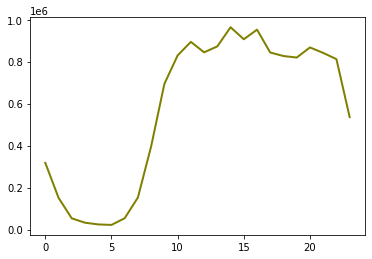

In [ ]:
# draw lines to see for each state where the peak hours are 
import matplotlib.pyplot as plt
df1=pd.DataFrame({'x_values': df['order_hours'][0:24], 'y_values': df['price_sum'][0:24]})
df1
plt.plot( 'x_values', 'y_values', data=df1,marker='', color='olive', linewidth=2)

In [ ]:
# if only look at the head market 
# how to apply multiple conditions 
filter1 = data["order_year"]==2018
filter2 = data['customer_state']=='SP'
df=data.where(filter1&filter2)
df=df.groupby(['order_hours']).sum()
df=df.add_suffix('_sum').reset_index()
df

,order_hours,order_item_id_sum,price_sum,freight_value_sum,payment_sequential_sum,payment_installments_sum,payment_value_sum,review_score_sum,customer_zip_code_prefix_sum,product_name_lenght_sum,...,product_photos_qty_sum,product_weight_g_sum,product_length_cm_sum,product_height_cm_sum,product_width_cm_sum,lead_time_po_approved_sum,lead_time_po_customer_sum,promosied_actual_sum,order_year_sum,order_month_sum
0,0.0,869.0,75990.12,10125.45,782.0,1855.0,120808.87,2778.0,6125078.0,32589.0,...,1484.0,1246050.0,20218.0,10373.0,14950.0,327.947894,2171.358299,7103.355394,1384348.0,3147.0
1,1.0,343.0,26647.64,4162.64,304.0,861.0,37993.40,1187.0,2581703.0,14118.0,...,675.0,422203.0,7989.0,4337.0,6109.0,153.960486,885.806956,2876.090405,585220.0,1397.0
2,2.0,213.0,14450.44,2079.07,152.0,515.0,31377.76,613.0,1240070.0,7391.0,...,309.0,303657.0,4226.0,2372.0,3509.0,79.139387,389.539769,1652.328854,300682.0,665.0
3,3.0,99.0,5852.39,1031.71,75.0,224.0,9510.56,296.0,666727.0,3603.0,...,159.0,131097.0,1865.0,1259.0,1469.0,45.135347,229.225706,670.874606,151350.0,352.0
4,4.0,114.0,5715.18,846.10,76.0,207.0,9421.35,272.0,603588.0,3620.0,...,161.0,111270.0,2011.0,1148.0,1685.0,43.928819,213.813947,888.412350,145296.0,421.0
5,5.0,61.0,4630.96,713.74,59.0,111.0,6256.15,237.0,471865.0,2430.0,...,111.0,102595.0,1404.0,763.0,1112.0,51.681030,142.818634,460.411725,104936.0,263.0
6,6.0,177.0,11485.25,1763.37,145.0,316.0,16864.49,583.0,1207815.0,7155.0,...,334.0,186658.0,3798.0,2000.0,2778.0,47.069097,395.373692,1383.441331,290592.0,653.0
7,7.0,424.0,36627.50,5191.01,366.0,901.0,50631.76,1508.0,3439528.0,17828.0,...,792.0,568726.0,10226.0,5292.0,7803.0,172.073137,1010.415012,3585.744167,730516.0,1629.0
8,8.0,1034.0,98179.71,13268.57,879.0,2167.0,136528.24,3531.0,8313662.0,42150.0,...,1827.0,1772502.0,26799.0,13281.0,19932.0,345.185787,2448.249213,8815.999421,1721354.0,3874.0
9,9.0,1554.0,147282.20,20185.80,1327.0,3119.0,209927.10,5464.0,11975303.0,63409.0,...,2881.0,2553505.0,37338.0,21245.0,28922.0,630.826412,3830.964815,13189.754815,2635508.0,5933.0


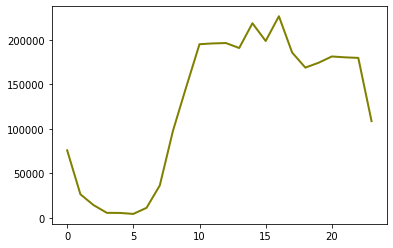

In [ ]:
df1=pd.DataFrame({'x_values': df['order_hours'][0:24], 'y_values': df['price_sum'][0:24]})
df1
plt.plot( 'x_values', 'y_values', data=df1,marker='', color='olive', linewidth=2)

# because brazil has diff time zone so we can have diff operation strategy on each state

In [ ]:
# we can see for each state order% at 24 hours
df=data.groupby(['order_hours','customer_state']).sum()
df=df.add_suffix('_sum').reset_index()
df

,order_hours,customer_state,order_item_id_sum,price_sum,freight_value_sum,payment_sequential_sum,payment_installments_sum,payment_value_sum,review_score_sum,customer_zip_code_prefix_sum,...,product_photos_qty_sum,product_weight_g_sum,product_length_cm_sum,product_height_cm_sum,product_width_cm_sum,lead_time_po_approved_sum,lead_time_po_customer_sum,promosied_actual_sum,order_year_sum,order_month_sum
0,0,AC,4,609.88,179.86,4,14,789.74,15,279639,...,8.0,14700.0,100.0,69.0,96.0,4.308148,21.000984,66.195081,8069,27
1,0,AL,10,1763.87,412.65,10,55,2176.52,40,571957,...,34.0,27625.0,382.0,189.0,258.0,5.807396,32.819641,83.058611,20175,60
2,0,AM,5,1763.95,192.48,5,25,1956.43,25,345676,...,6.0,2871.0,110.0,100.0,123.0,2.236586,17.892685,76.146620,10086,35
3,0,AP,2,238.90,88.84,2,7,327.74,9,137808,...,3.0,2083.0,107.0,18.0,30.0,0.019780,5.862384,48.355880,4035,13
4,0,BA,134,11710.90,2822.58,125,401,16896.64,439,5170095,...,274.0,242202.0,3406.0,1811.0,2512.0,58.159282,495.844769,1503.240729,238062,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,23,RS,358,33222.56,6182.17,320,966,44525.08,1229,28698121,...,640.0,615569.0,9251.0,4794.0,7218.0,123.041076,1011.689988,3797.766771,611297,1845
607,23,SC,229,23149.68,3992.13,202,659,34792.33,784,17701164,...,430.0,354585.0,5745.0,3244.0,4215.0,78.242373,713.249653,2034.815799,401473,1290
608,23,SE,18,2507.29,601.61,18,58,3108.90,71,883251,...,59.0,41675.0,504.0,386.0,346.0,6.226169,85.639919,180.605127,36315,109
609,23,SP,2370,205564.54,29425.77,2345,5697,264674.14,8373,17750796,...,4309.0,3966887.0,60351.0,32028.0,46421.0,763.949271,6609.229225,20100.223762,4087520,12592


In [ ]:
df1=data.groupby(['customer_state']).sum()
#df1=df.add_suffix('_sum').reset_index()
df1

,order_item_id,price,freight_value,payment_sequential,payment_installments,payment_value,review_score,customer_zip_code_prefix,product_name_lenght,product_description_lenght,...,product_weight_g,product_length_cm,product_height_cm,product_width_cm,lead_time_po_approved,lead_time_po_customer,promosied_actual,order_year,order_month,order_hours
customer_state,,,,,,,,,,,,,,,,,,,,,
AC,117,17007.46,3759.67,97,345,24890.49,388,6571949,4348.0,85204.0,...,175496.0,3005.0,1476.0,2071.0,51.828345,312.020058,1930.602674,189631,560,1340
AL,483,80358.45,15726.81,458,1719,107088.23,1682,25233715,21131.0,389376.0,...,841328.0,12789.0,7146.0,9954.0,219.537859,1602.210069,3486.973171,889711,2535,6519
AM,199,22594.27,5609.00,178,553,34490.67,693,11673713,8095.0,132902.0,...,252685.0,4645.0,2359.0,3646.0,63.737986,474.566644,3238.330486,340960,952,2560
AP,103,13508.91,2817.11,84,217,21451.33,351,5650681,4017.0,64199.0,...,153183.0,2499.0,1177.0,1878.0,58.445046,295.137477,1479.432477,165437,442,1232
BA,4575,519006.18,103418.34,4344,12881,769971.02,15115,172377975,189074.0,3201379.0,...,8443035.0,114921.0,64773.0,87626.0,1922.189236,13210.370972,40462.382928,7892543,23708,58108
CE,1735,229883.08,48374.37,1604,5402,331528.96,5778,91807281,72449.0,1244131.0,...,2901619.0,43125.0,24099.0,31738.0,694.517303,4876.905012,15655.596782,3006080,9266,21569
DF,2822,306818.52,51123.38,2498,6874,420767.08,9823,173459101,115387.0,1986577.0,...,4086338.0,69938.0,36772.0,52800.0,1043.990833,7832.131644,27542.367801,4884517,14849,36130
ES,2610,265831.19,49887.99,2390,6863,384483.95,9157,66921354,110904.0,1726853.0,...,4651066.0,67740.0,36660.0,51996.0,1000.414907,7831.012488,22896.546111,4608014,13936,33542
GO,2957,296884.87,53266.32,2535,7339,448385.80,9478,176453302,114122.0,1838298.0,...,4455481.0,68682.0,36441.0,51894.0,1235.306435,7185.549803,27101.968981,4747244,14234,34706


In [ ]:
df3=pd.merge(df,df1['price'],how='left',on=['customer_state'])
df3.info

In [ ]:
df3['24hours_perc']=df3['price_sum']/df3['price'].multiply(100)
df3['24hours_perc']=df3['24hours_perc'].multiply(100)
df3

In [ ]:
df3[df3.customer_state=='SP'].groupby(['order_hours']).sum()

#7pm is the rush hour for ac state 
# now we can see for each customer state how the order allocate by hours in one day 

,order_item_id_sum,price_sum,freight_value_sum,payment_sequential_sum,payment_installments_sum,payment_value_sum,review_score_sum,customer_zip_code_prefix_sum,product_name_lenght_sum,product_description_lenght_sum,...,product_length_cm_sum,product_height_cm_sum,product_width_cm_sum,lead_time_po_approved_sum,lead_time_po_customer_sum,promosied_actual_sum,order_year_sum,order_month_sum,price,24hours_perc
order_hours,,,,,,,,,,,,,,,,,,,,,
0,1406,125251.41,17787.85,1359,3336,183924.89,4763,10441830,56043.0,906466.0,...,35262.0,18344.0,26810.0,565.896956,3838.790475,12808.163102,2358559,7096,5293052.46,0.023663
1,641,56948.53,7806.03,568,1771,76214.10,2250,5027945,26668.0,396513.0,...,15418.0,8310.0,11930.0,280.228137,1893.126667,5948.229711,1109640,3525,5293052.46,0.010759
2,362,24083.79,3925.89,284,926,46450.90,1095,2264979,13145.0,207544.0,...,7439.0,4069.0,6035.0,143.561516,733.433009,3283.258206,554824,1689,5293052.46,0.004550
3,158,10916.24,1763.47,137,400,15480.07,552,1158062,6275.0,97677.0,...,3326.0,2006.0,2706.0,80.500660,422.896146,1397.008912,264302,790,5293052.46,0.002062
4,202,11665.95,1681.89,149,349,17905.34,548,1146687,6944.0,115933.0,...,3900.0,2008.0,3030.0,86.059155,458.694919,1716.720243,284469,968,5293052.46,0.002204
5,128,9436.16,1404.64,109,292,12856.24,432,821455,4675.0,72041.0,...,2866.0,1534.0,2376.0,88.956458,336.560926,983.676609,205786,693,5293052.46,0.001783
6,291,20905.81,3045.64,236,559,29405.47,921,2162905,11483.0,196413.0,...,6272.0,3398.0,4599.0,94.915775,626.767917,2544.612500,474139,1372,5293052.46,0.003950
7,681,57101.36,8323.70,609,1507,76208.57,2534,5742654,29192.0,455042.0,...,16762.0,9042.0,12990.0,300.326840,1704.991215,6415.547072,1210562,3497,5293052.46,0.010788
8,1721,157225.89,21700.72,1477,3722,225026.80,5960,13920472,69700.0,1145313.0,...,43358.0,22974.0,32757.0,577.192998,4229.126632,15364.199896,2885163,8534,5293052.46,0.029704


In [23]:
# sales per order analysis by state 
df=data.groupby(['order_year','customer_state']).sum()
df=df.add_suffix('_sum').reset_index()
df
df2=data.groupby(['order_year','customer_state']).order_id.nunique()
df2=df2.reset_index()
df2



,order_year,customer_state,order_id
0,2017,AC,53
1,2017,AL,196
2,2017,AM,72
3,2017,AP,28
4,2017,BA,1513
5,2017,CE,637
6,2017,DF,878
7,2017,ES,931
8,2017,GO,910
9,2017,MA,364


In [24]:
df3=pd.merge(df2,df,how='inner',left_on=['order_year','customer_state'],right_on=['order_year','customer_state'])
df3 = df3.filter(['order_year', 'customer_state', 'order_id','price_sum','freight_value_sum'], axis=1)
df3['avg_order_sales']=df3['price_sum']/df3['order_id']
df3['avg_freight_cost']=df3['freight_value_sum']/df3['order_id']
df3
# need to bucket each state based on purchase frequently and avg order sales


,order_year,customer_state,order_id,price_sum,freight_value_sum,avg_order_sales,avg_freight_cost
0,2017,AC,53,11643.56,2335.33,219.689811,44.062830
1,2017,AL,196,44600.65,7797.77,227.554337,39.784541
2,2017,AM,72,10618.27,2485.87,147.475972,34.525972
3,2017,AP,28,6052.15,1310.39,216.148214,46.799643
4,2017,BA,1513,239816.12,44347.79,158.503714,29.311163
5,2017,CE,637,115804.87,22780.99,181.797284,35.762936
6,2017,DF,878,140128.18,21495.48,159.599294,24.482323
7,2017,ES,931,118306.59,22804.68,127.074748,24.494823
8,2017,GO,910,141086.14,24192.14,155.039714,26.584769
9,2017,MA,364,59736.76,14810.01,164.111978,40.686841
